# 다변량 선형 회귀

## 보스톤 주택 가격을 다변량 선형 회귀를 이용해서 예측

In [3]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)
# sklearn ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "regression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

import platform
from matplotlib import font_manager, rc
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    mpl.rcParams['axes.unicode_minus'] = False
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
        plt.savefig(path, format=fig_extension, dpi=resolution)


In [4]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [10]:
# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(data, columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX",
"RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
# boston 데이터 세트의 target 배열은 주택 가격임 . 이를 PRICE 칼럼으로 DataFrame어|추가함.
bostonDF['PRICE'] = target

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

In [14]:
#훈련 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

#데이터를 7:3으로 분리 - 절대적인 비율은 아님
#8:2나 9:1 등도 사용해보고 경진대회에서는 100%사용하는것도 고려
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3,
random_state=156)

In [15]:
#회귀 모델을 생성하고 훈련
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
#평가
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_preds)
#mse는 제곱을 하므로 실제 데이터보다 스케일이 큰 경우가 많음
#mse의 제곱근을 많이 사용
rmse = np.sqrt(mse)

r2score = r2_score(y_test, y_pred)

print("MSE : ", mse)
print("RMSE : ", rmse)
print("R2 : ", r2score)

MSE :  17.29691590790215
RMSE :  4.158956107955715
R2 :  0.7572263323138921


In [19]:
#회귀 계수와 절편 값을 획인
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))


절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


### score.csv 파일의 데이터를 이용해서 iq와 acafemy, game, tv 정보를 이용해서 score 예측

In [21]:
df = pd.read_csv("../python_machine_learning-main/data/score.csv", encoding="ms949")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     10 non-null     object
 1   score    10 non-null     int64 
 2   iq       10 non-null     int64 
 3   academy  10 non-null     int64 
 4   game     10 non-null     int64 
 5   tv       10 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 608.0+ bytes


In [22]:
import statsmodels.formula.api as sm

result = sm.ols(formula = 'score ~ iq + academy + game + tv', data = df).fit()
print('절편과 기울기 : ', result.params)
print('유의확률:' , result.pvalues)
print('결정계수:' , result.rsquared)

절편과 기울기 :  Intercept    23.299232
iq            0.468422
academy       0.717901
game         -0.838955
tv           -1.385408
dtype: float64
유의확률: Intercept    0.117508
iq           0.003376
academy      0.534402
game         0.131001
tv           0.184269
dtype: float64
결정계수: 0.9608351062148871


In [24]:
#IQ가 130이고 학원을 3개 다니고 게임을 2시간하고 TV를 1시간 보는 학생의 예상 점수는 ?
y = result.params.Intercept + 130*result.params.iq + 3*result.params.academy + 2*result.params.game + 1*result.params.tv
print("예상 점수 : ", y)

예상 점수 :  83.28448678034155


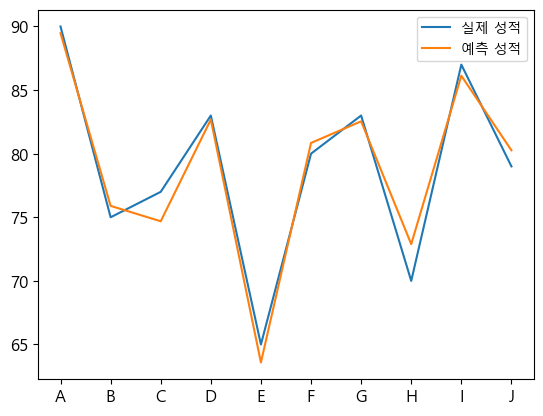

In [25]:
#예측 값과 실제 값의 시각화 - 결정 계수가 높으므로 오차가 별로 없음
plt.figure()
plt.plot(df['score'], label='실제 성적')
plt.plot(result.predict(), label='예측 성적')
plt.xticks(range(0,10,1),df['name'])
plt.legend();
plt.show()

In [28]:
#VIF(분산 팽차 요인) 출력 - VIF가 높은 academy를 제거하고 다시 출력
X = df.drop(['score', 'name'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor features
0   31.162062       iq
1   13.444494  academy
2    3.054510     game
3    7.783607       tv


In [ ]:
result = sm.ols(formula = 'score ~ iq + academy + game + tv', data = df).fit()
print('절편과 기울기 : ', result.params)
print('유의확률:' , result.pvalues)
print('결정계수:' , result.rsquared)

### 보스톤 주택 가격에 Ridge 모델 적용

In [29]:
from sklearn.linear_model import Ridge

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
print(y_target.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64


In [33]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

#적용할 규제 값
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target,
                                    scoring = "neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print("alpha{0} 일 대 folds의 평균 RMSE : {1}".format(alpha, avg_rmse))
    

alpha0 일 대 folds의 평균 RMSE : 5.828658946215806
alpha0.1 일 대 folds의 평균 RMSE : 5.788486627032412
alpha1 일 대 folds의 평균 RMSE : 5.652570965613549
alpha10 일 대 folds의 평균 RMSE : 5.518166280868973
alpha100 일 대 folds의 평균 RMSE : 5.329589628472148


# 비선형 회귀

## KNN

In [34]:
from sklearn.neighbors import KNeighborsRegressor
#거리를 가지고 가중 평균을 구해서 예측
#uniform을 설정하면 일반 평균
regressor = KNeighborsRegressor(n_neighbors = 3, weights = "distance")

X_train = [
    [0.5, 0.2, 0.1], 
    [0.9, 0.7, 0.3],
    [0.4, 0.5, 0.7],
    [0.2, 0.3, 0.5]
]

y_train = [0.5, 6.8, 9.0, 4.3]

regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [35]:
X_test = [
[0.2, 0.1, 0.7],
[0.4, 0.7, 0.6]
]

pred = regressor.predict(X_test)
print(pred)

[4.97716128 7.32372976]


In [37]:
#샘플 데이터를 생성
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

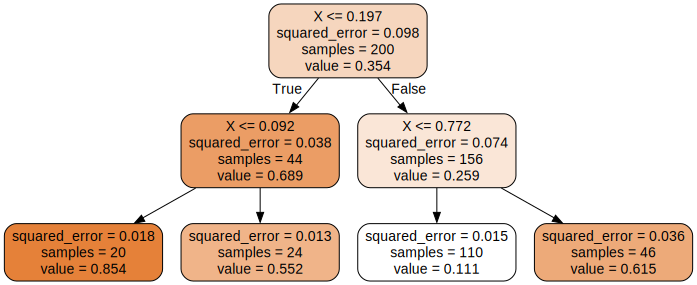

In [41]:
#트리 시각화
from graphviz import Source
from sklearn.tree import export_graphviz

#트리 시각화 파일 생성
export_graphviz(
    tree_reg,
    out_file="decision_tree.dot",
    feature_names=["X"],
    class_names=["y"],
    rounded=True,
    filled=True
)

#화면 출력
with open('decision_tree.dot') as f:
    dot_graph = f.read()
src = Source(dot_graph)
src

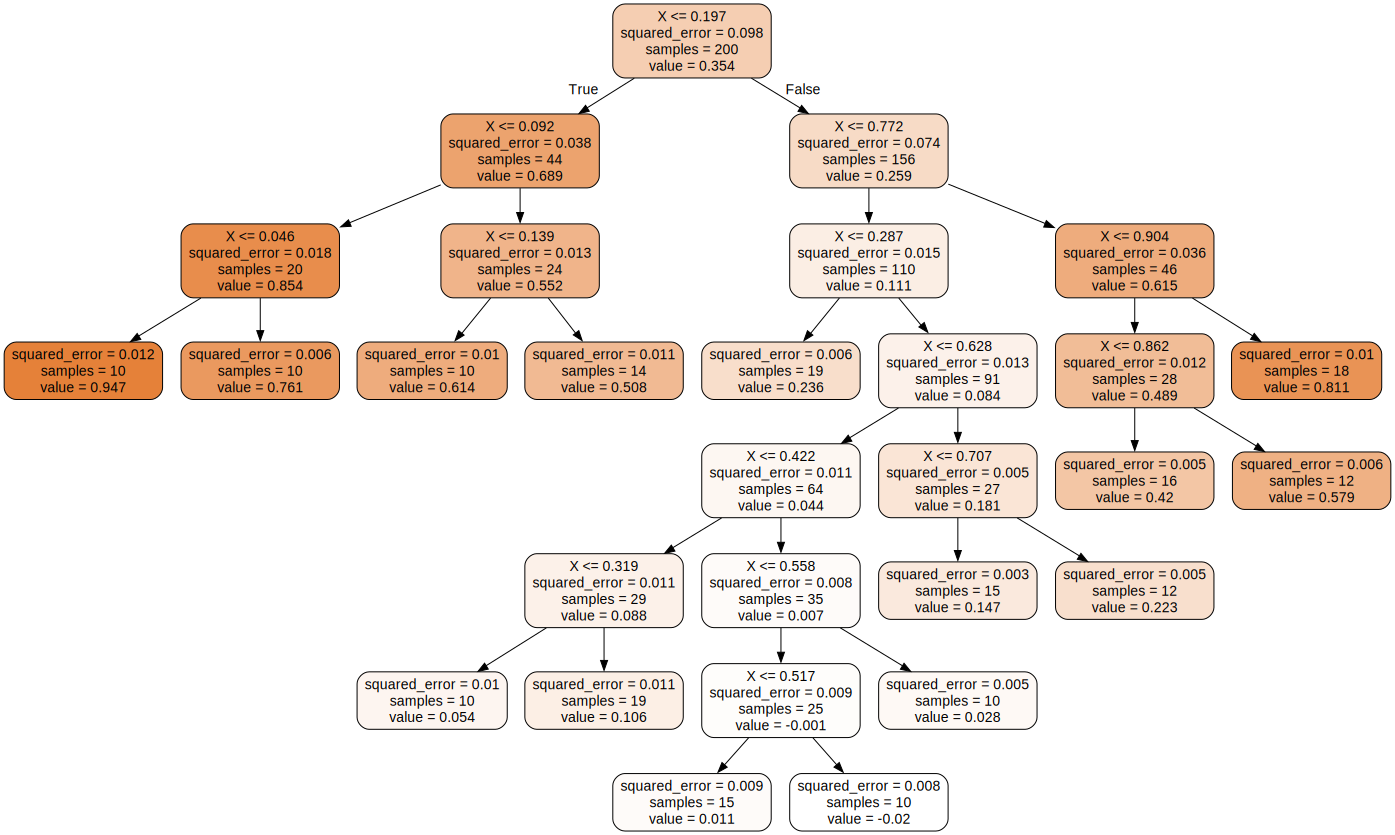

In [42]:
#터미널(자식이 없는 노드 - leaf node)의 개수가 10이상이어야 한다는 제약
#min_samples_leaf를 설정하게 되면 각 터미널의 depth가 일정하지 않을 수 있음
tree_reg = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)
tree_reg.fit(X, y)

#트리 시각화 파일 생성
export_graphviz(
    tree_reg,
    out_file="decision_tree.dot",
    feature_names=["X"],
    class_names=["y"],
    rounded=True,
    filled=True
)

#화면 출력
with open('decision_tree.dot') as f:
    dot_graph = f.read()
src = Source(dot_graph)
src

## SVM을 이용한 회귀

In [ ]:
np.random.seed(42)

#m : 머신러닝에서는 데이터(행)의 개수
#n : 행의 개수
m = 50

X = 2 * np.random.rand(m, 1)
#ravel은 차원을 하나 줄이는 역할을 수행하는 함수
#X 때문에 2차원 배열로 만들어지는 타겟은 1타원 배열이어야해서 차원을 수정
#flatten이나 reshape를 이용해서 조절을 해도 됨
y = (4 + 3 * X + np.random(m, 1)).flatten()
print(y)



In [ ]:
#시드 고정 후 가우시안 분포를 따르는 데이터셋을 만듭니다.
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m,1)
y = (4+3*X+np.random.randn(m,1)).ravel()
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]

# 모델 생성 과 훈련
from sklearn.svm import LinearSVR
# svm_reg = 마진이 큰 모형(epsilon=1.5)
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_train,y_train)


In [ ]:
y_pred = svm_reg.predict(X_test)
print(y_test)
print(y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)


In [50]:
#비선형 데이터 생성
m = 100
X = 2* np.random.rand(m,1) -1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m,1) / 10).ravel()

X_train = X[:80]
X_test = X[80:]
y_train = y[:80]
y_test = y[80:]

0.39517418408997823


C:\Users\user\AppData\Local\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


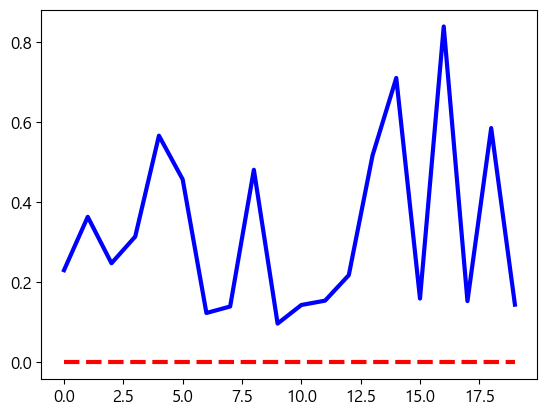

In [51]:
from sklearn.svm import LinearSVR

# 선형 SVM 적용 - 오차가 심함
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_train,y_train)

# 예측 및 결과 비교
y_pred = svm_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)


plt.plot(y_test, "b-", linewidth=3, label="test_set")
plt.plot(y_pred, "r--", linewidth=3, label="predict_set")
plt.show()

0.21136032163621837


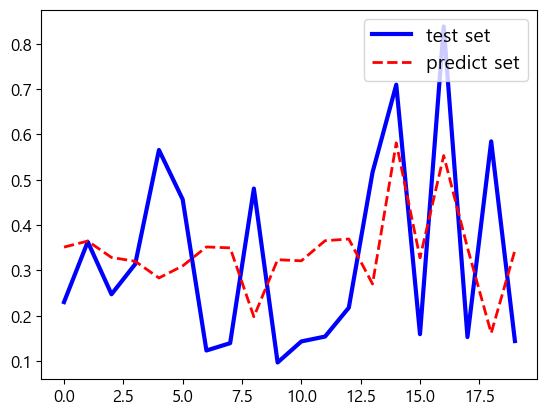

In [52]:
# 비선형 SVM 적용 
from sklearn.svm import SVR
#샘플 데이터를 2차 방정식으로 만들었기 때문에 지금은 degree가 2인 경우가 가장 잘맞음
#샘플 데이터르 알지 못한다면 degree는 하이퍼 파라미터 튜닝을 해서 구해야 함
svm_poly_reg = SVR(kernel='poly', epsilon=0.1)
svm_poly_reg.fit(X_train,y_train)

# 예측 및 결과 비교
y_pred = svm_poly_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

plt.plot(y_test, "b-", linewidth=3, label="test set")
plt.plot(y_pred, "r--", linewidth=2, label="predict set")
plt.legend(loc="upper right", fontsize=14)
plt.show()